# Setup

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

UNCLEADED_DATASET_PATH: str = 'updated_dataset.csv'
CLEANED_DATASET_PATH: str = 'cleaned_dataset.csv'

SONG_KEY_MAP: dict[int, str] = {
    -1: 'No-Key',
    0: 'C',
    1: 'C#',
    2: 'D',
    3: 'D#',
    4: 'E',
    5: 'F',
    6: 'F#',
    7: 'G',
    8: 'G#',
    9: 'A',
    10: 'A#',
    11: 'B'
}

TIME_SIGNATURE_MAP: dict[int, str] = {
    -1: "No-Time-Signature",
    3: "3/4",
    4: "4/4",
    5: "5/4",
    6: "6/4",
    7: "7/4",
}

uncleaned_df: pd.DataFrame = pd.read_csv(UNCLEADED_DATASET_PATH)
uncleaned_df.fillna(-1, inplace=True)
uncleaned_df.dropna(inplace=True)
uncleaned_df.info()
uncleaned_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81343 entries, 0 to 81342
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      81343 non-null  int64  
 1   Unnamed: 0        81343 non-null  int64  
 2   track_id          81343 non-null  object 
 3   artists           81343 non-null  object 
 4   album_name        81343 non-null  object 
 5   track_name        81343 non-null  object 
 6   popularity        81343 non-null  int64  
 7   duration_ms       81343 non-null  int64  
 8   explicit          81343 non-null  bool   
 9   danceability      81343 non-null  float64
 10  energy            81343 non-null  float64
 11  key               81343 non-null  int64  
 12  loudness          81343 non-null  float64
 13  mode              81343 non-null  int64  
 14  speechiness       81343 non-null  float64
 15  acousticness      81343 non-null  float64
 16  instrumentalness  81343 non-null  float6

,Unnamed: 0.1,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,20148,20148,2bpZXHIBksZowrsrEExapt,Sam Smith,Autumn Vibes 2022,Like I Can,0,166346,False,0.628,...,-5.565,0,0.0467,0.246000,0.000000,0.176,0.4620,99.800,4,dance
1,22030,22030,6BudTyfN4IAnhEndUwB1j3,Deicide,Metal,Once upon the Cross,0,214213,False,0.205,...,-8.498,0,0.1310,0.000019,0.805000,0.212,0.3130,184.498,4,death-metal
2,14927,14927,0ohjHMMCFpuACbaoITL3Ds,The Countdown Kids,Happy Halloween! (Spooky Favorites for Kids),The Time Warp,0,198000,False,0.478,...,-5.176,1,0.2310,0.298000,0.000015,0.121,0.4970,172.943,4,children
3,64498,64498,63wkGcwWKlBcUlhFP0grhK,Chet Baker,The Greatest Jazz Mix,The Touch Of Your Lips,0,160026,False,0.334,...,-15.333,0,0.0309,0.931000,0.001420,0.139,0.0627,59.054,4,jazz
4,78052,78052,3YEPUR731DgSBj3QBNsGEc,Bierkapitän,Ballermann Party Hits Megamix 2022.2,Ein Pils steht im Wald (Die Tannen zapfen),0,191102,False,0.657,...,-1.919,1,0.1640,0.125000,0.000000,0.312,0.3530,130.015,4,party


# Type Conversions and Dummy Extraction

In [90]:
typed_df: pd.DataFrame = uncleaned_df.copy()

# convert explicit column to binary
typed_df["explicit"] = typed_df["explicit"].map({True: 1, False: 0})

# extract keys
typed_df["key"] = typed_df["key"].map(SONG_KEY_MAP)
song_keys = typed_df["key"].dropna().unique()
typed_df = pd.get_dummies(typed_df, columns=["key"], dtype=int)

# extract time signatures
typed_df["time_signature"] = typed_df["time_signature"].map(TIME_SIGNATURE_MAP)
time_signatures = typed_df["time_signature"].dropna().unique()
typed_df = pd.get_dummies(typed_df, columns=["time_signature"], dtype=int)

# extract genres
genres = typed_df["track_genre"].dropna().unique()
typed_df = pd.get_dummies(typed_df, columns=["track_genre"], dtype=int)

typed_df.info()
typed_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81343 entries, 0 to 81342
Columns: 148 entries, Unnamed: 0.1 to track_genre_world-music
dtypes: float64(9), int64(135), object(4)
memory usage: 91.8+ MB


,Unnamed: 0.1,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,20148,20148,2bpZXHIBksZowrsrEExapt,Sam Smith,Autumn Vibes 2022,Like I Can,0,166346,0,0.628,...,0,0,0,0,0,0,0,0,0,0
1,22030,22030,6BudTyfN4IAnhEndUwB1j3,Deicide,Metal,Once upon the Cross,0,214213,0,0.205,...,0,0,0,0,0,0,0,0,0,0
2,14927,14927,0ohjHMMCFpuACbaoITL3Ds,The Countdown Kids,Happy Halloween! (Spooky Favorites for Kids),The Time Warp,0,198000,0,0.478,...,0,0,0,0,0,0,0,0,0,0
3,64498,64498,63wkGcwWKlBcUlhFP0grhK,Chet Baker,The Greatest Jazz Mix,The Touch Of Your Lips,0,160026,0,0.334,...,0,0,0,0,0,0,0,0,0,0
4,78052,78052,3YEPUR731DgSBj3QBNsGEc,Bierkapitän,Ballermann Party Hits Megamix 2022.2,Ein Pils steht im Wald (Die Tannen zapfen),0,191102,0,0.657,...,0,0,0,0,0,0,0,0,0,0


# Feature Selection and Engineering

In [91]:
# Removals
feature_df = typed_df.copy()
feature_df.drop(columns=["track_id", "artists", "album_name", "track_name"], inplace=True)

# Engineering
feature_df["duration_ms"] = feature_df["duration_ms"].astype(np.float64)
feature_df["duration_ms"] = feature_df["duration_ms"] / 1000  # convert to seconds
feature_df.rename(columns={"duration_ms": "duration_s"}, inplace=True)

feature_df.info()
feature_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81343 entries, 0 to 81342
Columns: 144 entries, Unnamed: 0.1 to track_genre_world-music
dtypes: float64(10), int64(134)
memory usage: 89.4 MB


,Unnamed: 0.1,Unnamed: 0,popularity,duration_s,explicit,danceability,energy,loudness,mode,speechiness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,20148,20148,0,166.346,0,0.628,0.6830,-5.565,0,0.0467,...,0,0,0,0,0,0,0,0,0,0
1,22030,22030,0,214.213,0,0.205,0.9500,-8.498,0,0.1310,...,0,0,0,0,0,0,0,0,0,0
2,14927,14927,0,198.000,0,0.478,0.7470,-5.176,1,0.2310,...,0,0,0,0,0,0,0,0,0,0
3,64498,64498,0,160.026,0,0.334,0.0788,-15.333,0,0.0309,...,0,0,0,0,0,0,0,0,0,0
4,78052,78052,0,191.102,0,0.657,0.9890,-1.919,1,0.1640,...,0,0,0,0,0,0,0,0,0,0


# Exporting

In [92]:
final_df = feature_df.copy()
final_df.to_csv(CLEANED_DATASET_PATH, index=False)

count    81343.000000
mean        35.249364
std         19.410056
min          0.000000
25%         21.000000
50%         35.000000
75%         49.000000
max        100.000000
Name: popularity, dtype: float64

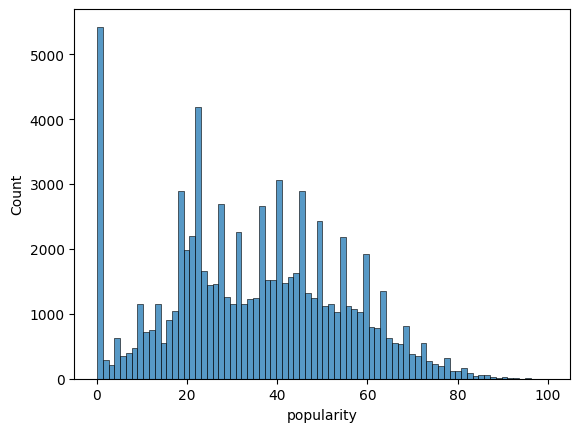

In [111]:
histogram_df = feature_df.copy()
# histogram = sns.histplot(histogram_df["popularity"])
# histogram.set(xlabel="Popularity", ylabel="Count")
boxplot = sns.histplot(histogram_df["popularity"])

boxplot
histogram_df["popularity"].describe()